In [23]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import pandas_ta as ta
import quantstats as qs
qs.extend_pandas()

import numpy as np
from datetime import datetime
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

params = {'figure.facecolor': 'w'}
plt.rcParams.update(params)

from IPython.display import display
import json

## Prepare

In [24]:
def read_config(config_filepath):
    '''
    Read JSON config file as dictionary
    '''
    with open(config_filepath) as f:
        config_dict = json.load(f)
    return config_dict

In [25]:
# Setup Parameters
confile = "20220607_INCO-ANTM_sq_v0-1.json"
mode = "backtest"

# Read Cron Config
cron_config_filepath = "cron_config.json"
cron_config_dict = read_config(cron_config_filepath)

config_dir = cron_config_dict["config_dir"]

# Read Benchmark Config
config_filepath = config_dir + confile
config_dict = read_config(config_filepath)
run_dict = config_dict['run_params']
benchmark_filepath = run_dict['base_benchmark_dir'] + mode + '/' + run_dict['benchmark_filename']

# Prepare Returns df
df = pd.read_csv(benchmark_filepath, index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
s_ret = df.set_index('Date')['return']

## Metrics

### Basic PnL Metrics

In [27]:
qs.reports.metrics(returns=s_ret, rf=0.025, mode='basic')

                    Strategy
------------------  ----------
Start Period        2022-01-03
End Period          2022-06-16
Risk-Free Rate      2.5%
Time in Market      27.0%

Cumulative Return   31.33%
CAGR﹪              83.41%

Sharpe              2.03
Prob. Sharpe Ratio  80.59%
Sortino             4.88
Sortino/√2          3.45
Omega               2.13

Max Drawdown        -13.52%
Longest DD Days     57

Gain/Pain Ratio     1.21
Gain/Pain (1M)      1.81

Payoff Ratio        1.43
Profit Factor       2.21
Common Sense Ratio  3.51
CPC Index           1.92
Tail Ratio          1.59
Outlier Win Ratio   13.11
Outlier Loss Ratio  2.06

MTD                 -5.75%
3M                  -10.06%
6M                  31.33%
YTD                 31.33%
1Y                  31.33%
3Y (ann.)           83.41%
5Y (ann.)           83.41%
10Y (ann.)          83.41%
All-time (ann.)     83.41%

Avg. Drawdown       -13.52%
Avg. Drawdown Days  57
Recovery Factor     2.32
Ulcer Index         0.05
Serenity Index    

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


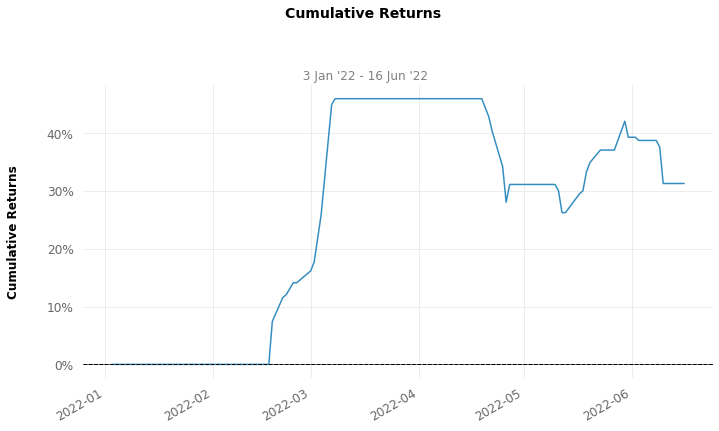

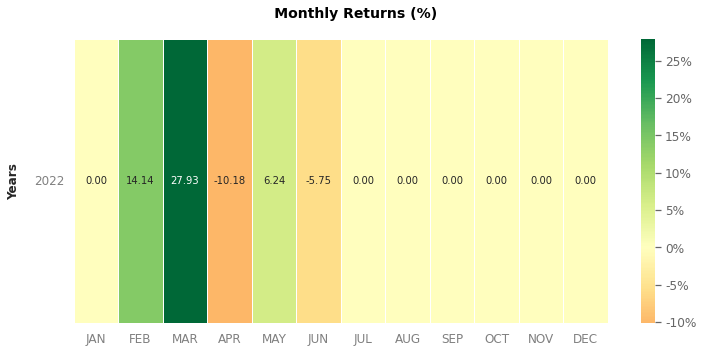

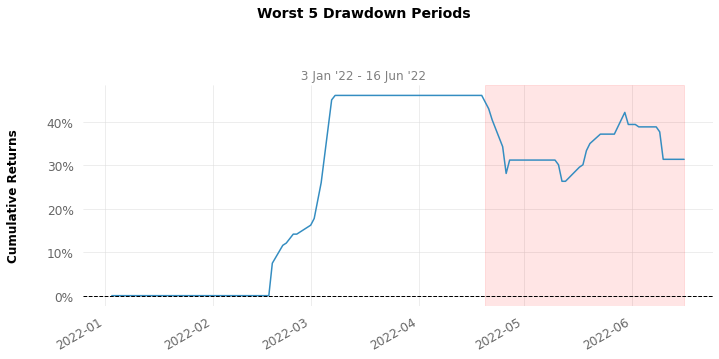

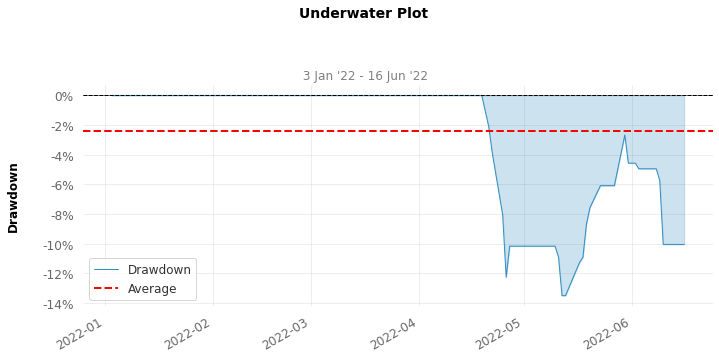

In [26]:
qs.plots.returns(s_ret)
qs.plots.monthly_heatmap(s_ret)
qs.plots.drawdowns_periods(s_ret)
qs.plots.drawdown(s_ret)

### Additional Metrics